# Initial WSJ Data Exploration

It seems the WSJ data only goes back to Feb 5, 1971 (and is missing some dates). We'll want to find some other data that covers from 1918 - 1971 if possible or at least 1945 - 1971 (post-WWII).

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import set_style
set_style("whitegrid")

In [126]:
dst_data = pd.DataFrame()

In [127]:
price2 = pd.read_csv('WSJ_HistoricalPrices(Jan 1, 1981 - Oct 10, 2024).csv')
price1 = pd.read_csv('WSJ_HistoricalPrices(Feb 5, 1971 - Dec 31, 1980).csv')
dates = pd.read_csv('DaylightSavingsTimeChangeDates_1971-2024.csv')
wsp_data = pd.read_csv('World-Stock-Prices-Dataset.csv')

In [128]:
price = pd.concat([price2, price1], axis=0)
#price

In [129]:
# dataframe in chronological order
price_chrono = price.iloc[::-1].reset_index(drop=True)
#price_chrono

In [130]:
dst_dates = pd.to_datetime(dates.Date+" "+dates.Year.astype(str))

In [131]:
price['Date'] = pd.to_datetime(price.Date, format="%m/%d/%y")
wsp_data['Date'] = pd.to_datetime(wsp_data.Date, utc=True).apply(lambda x: x.date())

In [132]:
dst_mon_spring = dst_dates+pd.DateOffset(1)
dst_fri_spring = dst_dates+pd.DateOffset(-2)

In [142]:
amzn = wsp_data.loc[wsp_data.Ticker == 'AMZN'].astype({'Date': 'datetime64[ns]'}) #AMZN MSFT COST
msft = wsp_data.loc[wsp_data.Ticker == 'MSFT'].astype({'Date': 'datetime64[ns]'})
cost = wsp_data.loc[wsp_data.Ticker == 'COST'].astype({'Date': 'datetime64[ns]'})

amzn_mon_data = amzn[amzn.Date.isin(dst_mon_spring)].reset_index(drop=True)
amzn_fri_data = amzn[amzn.Date.isin(dst_fri_spring)].reset_index(drop=True)

msft_mon_data = msft[msft.Date.isin(dst_mon_spring)].reset_index(drop=True)
msft_fri_data = msft[msft.Date.isin(dst_fri_spring)].reset_index(drop=True)

cost_mon_data = cost[cost.Date.isin(dst_mon_spring)].reset_index(drop=True)
cost_fri_data = cost[cost.Date.isin(dst_fri_spring)].reset_index(drop=True)

amzn_test_data=pd.DataFrame()
amzn_test_data['DST_Date'] = amzn_mon_data.Date+pd.DateOffset(-1)
amzn_test_data['Weekend_Volume_Difference'] = amzn_fri_data.Volume - amzn_mon_data.Volume
amzn_test_data['Ticker'] = amzn_mon_data.Ticker

msft_test_data=pd.DataFrame()
msft_test_data['DST_Date'] = msft_mon_data.Date+pd.DateOffset(-1)
msft_test_data['Weekend_Volume_Difference'] = msft_fri_data.Volume - msft_mon_data.Volume
msft_test_data['Ticker'] = msft_mon_data.Ticker

cost_test_data=pd.DataFrame()
cost_test_data['DST_Date'] = cost_mon_data.Date+pd.DateOffset(-1)
cost_test_data['Weekend_Volume_Difference'] = cost_fri_data.Volume - cost_mon_data.Volume
cost_test_data['Ticker'] = cost_mon_data.Ticker

In [144]:
dst_data = price[price.Date.isin(dst_mon_spring)].reset_index(drop=True)
#print(price[price.Date.isin(dst_mon_spring)])
test_data = pd.concat([amzn_test_data, msft_test_data, cost_test_data])

<Axes: xlabel='DST_Date', ylabel='Weekend_Volume_Difference'>

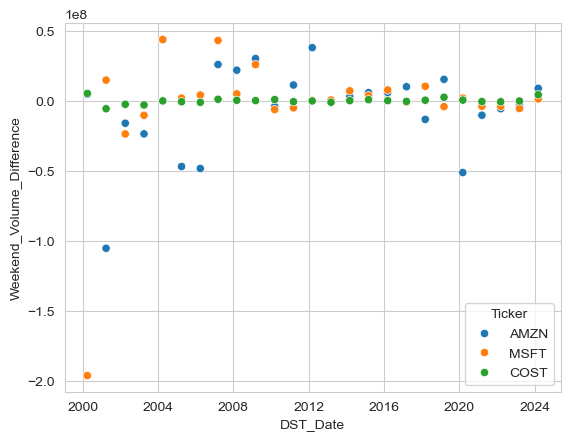

In [145]:
sns.scatterplot(test_data, x='DST_Date', y='Weekend_Volume_Difference', hue='Ticker')